# Waste Collection Analysis at Degraves Street

**Authored by:** Aishwarya Mahajan  
**Level:** Intermediate  
**Pre-requisite Skills:** Python, Data Analysis, Data Visualization

## Scenario

Imagine a city striving for sustainability without efficient waste management! Effective waste collection and management are essential for maintaining a healthy environment, reducing pollution, and promoting well-being among residents. This analysis focuses on determining the factors influencing the amount of waste collected at Degraves Street recycling facility, which can guide policy-making and operational strategies for better waste management in Melbourne.

## User Story

As a responsible citizen, I am eager to explore the factors affecting waste collection at Degraves Street. By thoroughly analyzing these factors, we can identify key variables such as the time of year and city events. This investigation aligns closely with our mission to prioritize environmental sustainability and improve the well-being of Melbourne’s residents. Through this analysis, I aim to discover:

- The influence of different times of the year on waste collection.
- The impact of city events on the volume of waste collected.

## What This Use Case Will Teach

At the end of this use case, I will:

- Identify key variables contributing to the increase or decrease in the amount of waste collected.
- Analyze seasonal trends in waste collection.
- Assess the impact of city events on the volume of waste.
- Use Python for data retrieval and analysis.
- Create visualizations to present insights effectively.

## Introduction

Effective waste management is crucial for maintaining a sustainable and healthy environment. Degraves Street in Melbourne is a focal point for waste collection and recycling efforts. By analyzing the data related to waste collection, we can uncover the factors that influence waste volumes and develop strategies to optimize waste management processes. This analysis will use two primary datasets: organic waste collected at Degraves Street and event permits in the city. These datasets will help us understand how different times of the year and city events impact waste collection.

## Datasets

To complete our waste collection analysis, the following datasets will be used:

### Waste Collection Data

- **organic-waste-collected-at-degraves-st-recycling-facility-2016.csv:** Data on organic waste collected at Degraves Street recycling facility in 2016.
link: https://data.melbourne.vic.gov.au/explore/dataset/organic-waste-collected-at-degraves-st-recycling-facility-2016/information/?sort=date

### Event Data

- **event_permits_2014-2018.csv:** Information about events happening in the city, including dates and expected attendance.
link: https://data.melbourne.vic.gov.au/explore/dataset/event-permits-2014-2018-including-film-shoots-photo-shoots-weddings-christmas-pa/information/

## Expected Outcomes

- Identification of key factors influencing waste collection at Degraves Street.
- Insights into how different times of the year and city events affect waste volumes.
- Recommendations for city planners and waste management authorities to reduce waste and improve recycling rates.

## Conclusion

By understanding the factors that affect waste collection at Degraves Street, this project aims to contribute to environmental sustainability and the well-being of the city's residents. The insights gained from this analysis will support the development of effective waste management policies and practices.



## Importing Necessary Libraries

In [1]:

# Importing standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Importing libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Importing libraries for web requests and data handling
import requests
from io import StringIO

# Additional libraries will be added as needed


## Retrieving the datasets and using them as Dataframes

### Below I am using the base_url and retrieving the datasets using specified dataset ids. Further, printing few records of the datasets and using them as dataframes for analysis


In [2]:

# Function to collect data
def collect_data(dataset_id):
    base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
    format = 'csv'
    url = f'{base_url}{dataset_id}/exports/{format}'
    params = {
        'select': '*',
        'limit': -1,  # all records
        'lang': 'en',
        'timezone': 'UTC',
    }

    # GET request
    response = requests.get(url, params=params)

    if response.status_code == 200:
        # StringIO to read the CSV data
        url_content = response.content.decode('utf-8')
        # Try to determine the delimiter by reading the first few lines
        delimiter = ','
        sample_lines = url_content.split('\n')[:5]
        for line in sample_lines:
            if ';' in line:
                delimiter = ';'
                break
        df = pd.read_csv(StringIO(url_content), delimiter=delimiter)
        print(f'Successfully retrieved dataset: {dataset_id}')
        return df
    else:
        print(f'Request failed with status code {response.status_code}')
        return None

# Dataset IDs
dataset_ids = {
    'organic_waste': 'organic-waste-collected-at-degraves-st-recycling-facility-2016',
    'event_permits': 'event-permits-2014-2018-including-film-shoots-photo-shoots-weddings-christmas-pa'
}

# Collecting and printing data for each dataset
datasets = {}
for name, dataset_id in dataset_ids.items():
    print(f"\nCollecting data for {name}...")
    df = collect_data(dataset_id)
    if df is not None:
        datasets[name] = df
        print(f"The {name} dataset contains {len(df)} records.")
        print(df.head(3))
    else:
        print(f"Failed to retrieve the {name} dataset.")

# Assigning the datasets to variables
Waste_df = datasets.get('organic_waste')
Events_df = datasets.get('event_permits')




Successfully retrieved dataset: organic-waste-collected-at-degraves-st-recycling-facility-2016
The organic_waste dataset contains 366 records.
        day        date  gross_weight_bin_1_kg  gross_weight_bin_2_kg  \
0  Saturday  2016-01-02                   44.7                    NaN   
1    Friday  2016-01-08                   65.1                   68.2   
2    Sunday  2016-01-10                   81.3                    NaN   

   gross_weight_bin_3_kg  gross_weight_bin_4_kg  daily_estimated_net_weight_kg  
0                    NaN                    NaN                           35.7  
1                    NaN                    NaN                          115.3  
2                    NaN                    NaN                           72.3  

Successfully retrieved dataset: event-permits-2014-2018-including-film-shoots-photo-shoots-weddings-christmas-pa
The event_permits dataset contains 2827 records.
                title event_start   event_end       category_1 category_2  \

## Initial EDA for the Datasets

### Now, beginning with initial data analysis and preprocessing to understand the datasets.

In [3]:

num_rows, num_cols = Waste_df.shape

print("Rows in the waste_df :", num_rows)
print("Columns in the waste_df is:", num_cols)

print(Waste_df.head())


Rows in the waste_df : 366
Columns in the waste_df is: 7
         day        date  gross_weight_bin_1_kg  gross_weight_bin_2_kg  \
0   Saturday  2016-01-02                   44.7                    NaN   
1     Friday  2016-01-08                   65.1                   68.2   
2     Sunday  2016-01-10                   81.3                    NaN   
3  Wednesday  2016-01-13                   49.9                   56.9   
4  Wednesday  2016-01-20                   84.0                   55.8   

   gross_weight_bin_3_kg  gross_weight_bin_4_kg  daily_estimated_net_weight_kg  
0                    NaN                    NaN                           35.7  
1                    NaN                    NaN                          115.3  
2                    NaN                    NaN                           72.3  
3                   35.0                    NaN                          114.8  
4                    NaN                    NaN                          121.8  


In [4]:

num_rows, num_cols = Events_df.shape

print("Rows in the events_df :", num_rows)
print("Columns in the events_df is:", num_cols)

print(Events_df.head())


Rows in the events_df : 2827
Columns in the events_df is: 6
                title event_start   event_end       category_1 category_2  \
0             Anthony  2015-02-17  2015-02-17  Filming - Movie        NaN   
1  Spirit Of The Game  2015-08-18  2015-08-18  Filming - Movie        NaN   
2       Ali's Wedding  2015-11-30  2015-11-30  Filming - Movie        NaN   
3            Dogfight  2016-08-23  2016-08-23  Filming - Movie        NaN   
4  Dogfight Unit Base  2016-09-21  2016-09-21  Filming - Movie        NaN   

                 location  
0  Inner Suburb Locations  
1         Carlton Gardens  
2  Inner Suburb Locations  
3  Inner Suburb Locations  
4       Flagstaff Gardens  


## Data Cleaning and preprocessing

### Dropping the uncessary columns, checking for missing values and replacing them with appropriate values.

In [5]:
# Print column names to identify the correct ones to drop
print("Columns in Waste_df:", Waste_df.columns)
print("Columns in Events_df:", Events_df.columns)

Columns in Waste_df: Index(['day', 'date', 'gross_weight_bin_1_kg', 'gross_weight_bin_2_kg',
       'gross_weight_bin_3_kg', 'gross_weight_bin_4_kg',
       'daily_estimated_net_weight_kg'],
      dtype='object')
Columns in Events_df: Index(['title', 'event_start', 'event_end', 'category_1', 'category_2',
       'location'],
      dtype='object')


In [6]:
# Dropping unnecessary columns from Waste_df
columns_to_drop_waste = ['gross_weight_bin_1_kg', 'gross_weight_bin_2_kg', 'gross_weight_bin_3_kg', 'gross_weight_bin_4_kg']
Waste_df.drop(columns=columns_to_drop_waste, inplace=True)

# Dropping unnecessary columns from Events_df
columns_to_drop_events = ['title', 'category_2']
Events_df.drop(columns=columns_to_drop_events, inplace=True)

# Checking the results
print("\nAfter dropping unnecessary columns:")
print("\nWaste_df:")
print(Waste_df.head())
print("\nEvents_df:")
print(Events_df.head())


After dropping unnecessary columns:

Waste_df:
         day        date  daily_estimated_net_weight_kg
0   Saturday  2016-01-02                           35.7
1     Friday  2016-01-08                          115.3
2     Sunday  2016-01-10                           72.3
3  Wednesday  2016-01-13                          114.8
4  Wednesday  2016-01-20                          121.8

Events_df:
  event_start   event_end       category_1                location
0  2015-02-17  2015-02-17  Filming - Movie  Inner Suburb Locations
1  2015-08-18  2015-08-18  Filming - Movie         Carlton Gardens
2  2015-11-30  2015-11-30  Filming - Movie  Inner Suburb Locations
3  2016-08-23  2016-08-23  Filming - Movie  Inner Suburb Locations
4  2016-09-21  2016-09-21  Filming - Movie       Flagstaff Gardens


In [7]:
# Display the shape of the modified dataframes
num_rows_waste, num_cols_waste = Waste_df.shape
num_rows_events, num_cols_events = Events_df.shape

print(f"\nWaste_df now has {num_rows_waste} rows and {num_cols_waste} columns.")
print(f"Events_df now has {num_rows_events} rows and {num_cols_events} columns.")


Waste_df now has 366 rows and 3 columns.
Events_df now has 2827 rows and 4 columns.


## Checking for missing values

In [8]:
# Check for missing values in Waste_df
missing_values_waste = Waste_df.isnull().sum()

# Check for missing values in Events_df
missing_values_events = Events_df.isnull().sum()

print("Missing values in Waste_df:")
print(missing_values_waste)
print("\nMissing values in Events_df:")
print(missing_values_events)


Missing values in Waste_df:
day                              0
date                             0
daily_estimated_net_weight_kg    7
dtype: int64

Missing values in Events_df:
event_start    0
event_end      4
category_1     0
location       5
dtype: int64


## Calculating the skewness of columns having missing values
### skewness will help in determining the value to be used for imputing the data

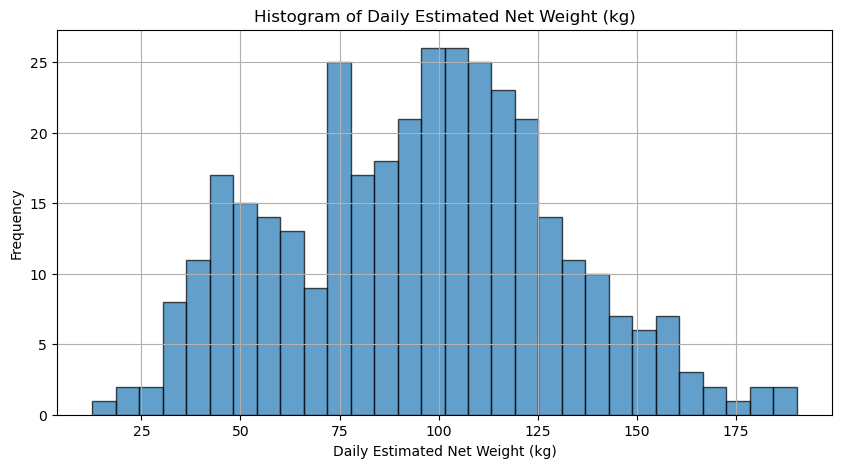

Skewness of 'daily_estimated_net_weight_kg': 0.08145378145663432



In [9]:

# Draw histogram and calculate skewness for 'daily_estimated_net_weight_kg' in Waste_df
plt.figure(figsize=(10, 5))
plt.hist(Waste_df['daily_estimated_net_weight_kg'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Daily Estimated Net Weight (kg)')
plt.xlabel('Daily Estimated Net Weight (kg)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

waste_skewness = Waste_df['daily_estimated_net_weight_kg'].dropna().skew()
print(f"Skewness of 'daily_estimated_net_weight_kg': {waste_skewness}\n")


### Given that the skewness of daily_estimated_net_weight_kg is very close to 0 (0.081), indicating that the distribution is approximately symmetric, it is appropriate to fill the missing values with the mean.
### Imputing missing values with Mean

In [10]:
# Calculate the mean of 'daily_estimated_net_weight_kg'
mean_weight = Waste_df['daily_estimated_net_weight_kg'].mean()

# Fill missing values with the mean
Waste_df['daily_estimated_net_weight_kg'].fillna(mean_weight, inplace=True)

# Verify that there are no missing values left
print(Waste_df.isnull().sum())


day                              0
date                             0
daily_estimated_net_weight_kg    0
dtype: int64


In [11]:
# Drop rows with missing 'event_end' values
Events_df_cleaned = Events_df.dropna(subset=['event_end'])

# Fill missing values in 'location' with 'Unknown'
Events_df_cleaned['location'].fillna('Unknown', inplace=True)

# Verify that there are no missing values left
print("Missing values in Events_df_cleaned after handling:")
print(Events_df_cleaned.isnull().sum())


Missing values in Events_df_cleaned after handling:
event_start    0
event_end      0
category_1     0
location       0
dtype: int64


C:\Users\aishw\AppData\Local\Temp\ipykernel_43800\2250874029.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Events_df_cleaned['location'].fillna('Unknown', inplace=True)


## Encoding categorical variable
### Encoding the categorical variable to numeric values using label encoding

In [12]:

# Create a label encoder
label_encoder = LabelEncoder()

# Fit and transform the 'category_1' column
Events_df_cleaned['category_1_encoded'] = label_encoder.fit_transform(Events_df_cleaned['category_1'])

# Drop the original 'category_1' column
Events_df_cleaned.drop(columns=['category_1'], inplace=True)

# Display the unique values and their corresponding encoded values
category_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Category to Numeric Mapping:\n", category_mapping)

# Display the first few rows to check the encoded column
print(Events_df_cleaned.head())


Category to Numeric Mapping:
 {'Filming - Movie': 0, 'Filming - Other': 1, 'Filming - Photo shoot': 2, 'Filming - Student': 3, 'Filming - TV Series': 4, 'Filming - TV Series, Filming - Unit': 5, 'Filming - TVC': 6, 'Filming - TVC, Recreation and Sport': 7, 'Filming - Unit Base': 8, 'Filming -- Other': 9, 'Private Event': 10, 'Private Event -': 11, 'Promotion': 12, 'Pubilc Event - Non-ticketed': 13, 'Public Event': 14, 'Public Event - Cycling': 15, 'Public Event - Cycling Event': 16, 'Public Event - Low Impact Activity': 17, 'Public Event - Low Impact Activity,': 18, 'Public Event - Media Launch': 19, 'Public Event - Media Launch Event': 20, 'Public Event - Media/Launch Event': 21, 'Public Event - Memorial': 22, 'Public Event - Music': 23, 'Public Event - Music Event': 24, 'Public Event - Non Ticketed': 25, 'Public Event - Non-ticketed': 26, 'Public Event - Outside Broadcast': 27, 'Public Event - Parade': 28, 'Public Event - Run Walk': 29, 'Public Event - Run/Walk': 30, 'Public Event - 

C:\Users\aishw\AppData\Local\Temp\ipykernel_43800\3078147192.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Events_df_cleaned['category_1_encoded'] = label_encoder.fit_transform(Events_df_cleaned['category_1'])
C:\Users\aishw\AppData\Local\Temp\ipykernel_43800\3078147192.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Events_df_cleaned.drop(columns=['category_1'], inplace=True)


## Performing Descriptive and Time Series Analysis

### Descriptive Statistics
Calculating summary statistics to understand the distribution of numerical columns.

### Time Series Analysis
Analyse the Waste_df dataset over time to see trends in waste collecatasets.

In [13]:
# Descriptive statistics for Waste_df
print("Descriptive statistics for Waste_df:")
print(Waste_df.describe())

# Descriptive statistics for Events_df_cleaned
print("\nDescriptive statistics for Events_df_cleaned:")
print(Events_df_cleaned.describe())


Descriptive statistics for Waste_df:
       daily_estimated_net_weight_kg
count                     366.000000
mean                       95.014485
std                        34.399736
min                        12.600000
25%                        71.850000
50%                        96.300000
75%                       117.875000
max                       190.400000

Descriptive statistics for Events_df_cleaned:
       category_1_encoded
count         2823.000000
mean            19.679065
std             10.895341
min              0.000000
25%             10.000000
50%             25.000000
75%             31.000000
max             32.000000


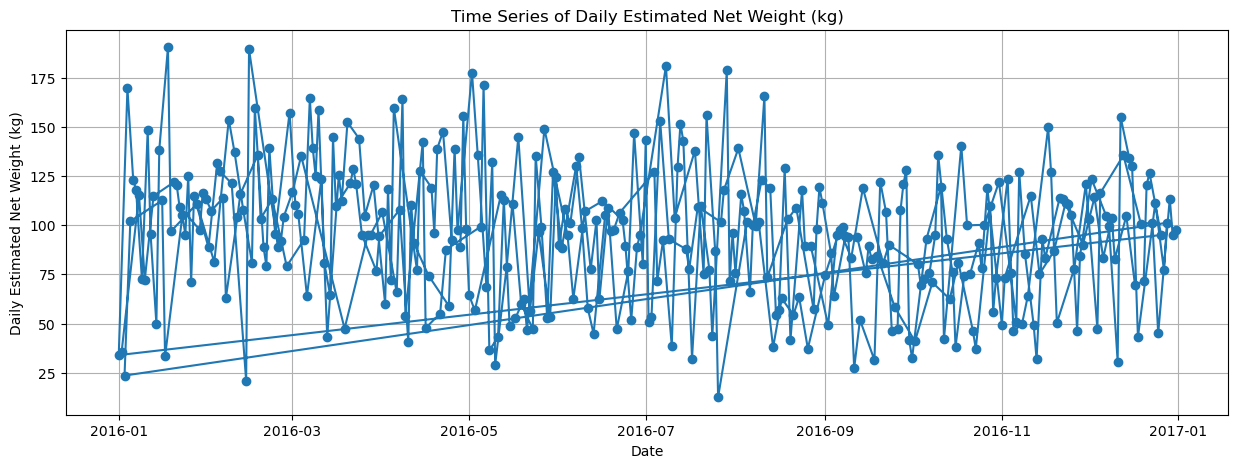

In [14]:
# Convert 'date' to datetime format in Waste_df
Waste_df['date'] = pd.to_datetime(Waste_df['date'])

# Plot time series of daily estimated net weight
plt.figure(figsize=(15, 5))
plt.plot(Waste_df['date'], Waste_df['daily_estimated_net_weight_kg'], marker='o')
plt.title('Time Series of Daily Estimated Net Weight (kg)')
plt.xlabel('Date')
plt.ylabel('Daily Estimated Net Weight (kg)')
plt.grid(True)
plt.show()
